# Gaussian Mixture Models on Real Biomedical Data

This notebook applies the Expectation-Maximization (EM) algorithm for Gaussian Mixture Models (GMMs) to a real biomedical dataset: the Breast Cancer Wisconsin (Diagnostic) dataset. The goal is to assess how well GMM can uncover structure in real data and compare the effectiveness of different initialization strategies.

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## 1. Load and explore the dataset

In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Dimensionality reduction with PCA (2D)

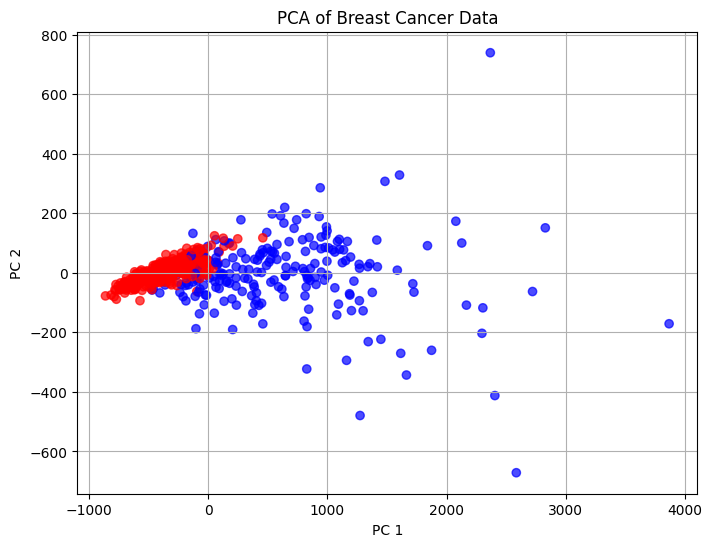

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("PCA of Breast Cancer Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


## 3. Fit GMM with KMeans and Random initialization

In [13]:
from emgmm import GMM
from sklearn.metrics import adjusted_rand_score

# Reduce data to 2D for simplicity
X_used = X_pca

gmm_kmeans = GMM(n_components=2, init_method="kmeans")
gmm_kmeans.fit(X_used)
labels_kmeans = gmm_kmeans.predict(X_used)
ari_kmeans = adjusted_rand_score(y, labels_kmeans)

gmm_random = GMM(n_components=2, init_method="random")
gmm_random.fit(X_used)
labels_random = gmm_random.predict(X_used)
ari_random = adjusted_rand_score(y, labels_random)

print(f"ARI (KMeans Init): {ari_kmeans:.3f}")
print(f"ARI (Random Init): {ari_random:.3f}")


ARI (KMeans Init): 0.755
ARI (Random Init): 0.755


## 4. Visual comparison of clustering results

In [14]:
from emgmm import plot_gmm_interactive

plot_gmm_interactive(X_used, labels_kmeans, gmm_kmeans.means_, gmm_kmeans.covariances_, title="GMM Clustering (KMeans Init)")
plot_gmm_interactive(X_used, labels_random, gmm_random.means_, gmm_random.covariances_, title="GMM Clustering (Random Init)")


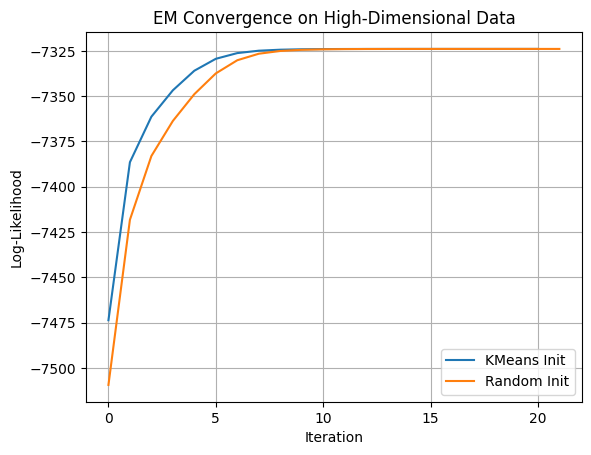

KMeans loglik: -7323.938616553985
Random loglik: -7323.938623200196


In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(gmm_kmeans.log_likelihood_, label="KMeans Init")
plt.plot(gmm_random.log_likelihood_, label="Random Init")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("EM Convergence on High-Dimensional Data")
plt.legend()
plt.grid(True)
plt.show()

print("KMeans loglik:", gmm_kmeans.log_likelihood_[-1])
print("Random loglik:", gmm_random.log_likelihood_[-1])